In [555]:
import pandas as pd

df = pd.read_csv('dataset.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [556]:
import matplotlib.pyplot as plt

def plot_class_frequencies(train_df, test_df):
    train_counts = train_df['Revenue'].value_counts()
    test_counts = test_df['Revenue'].value_counts()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))
    
    train_counts.plot(kind='bar', color=['dodgerblue', 'orange'], ax=ax1)
    ax1.set_title('Frecventa de aparitie a claselor pentru setul de antrenare')
    
    test_counts.plot(kind='bar', color=['dodgerblue', 'orange'], ax=ax2)
    ax2.set_title('Frecventa de aparitie a claselor pentru setul de test')

    plt.tight_layout()
    plt.show

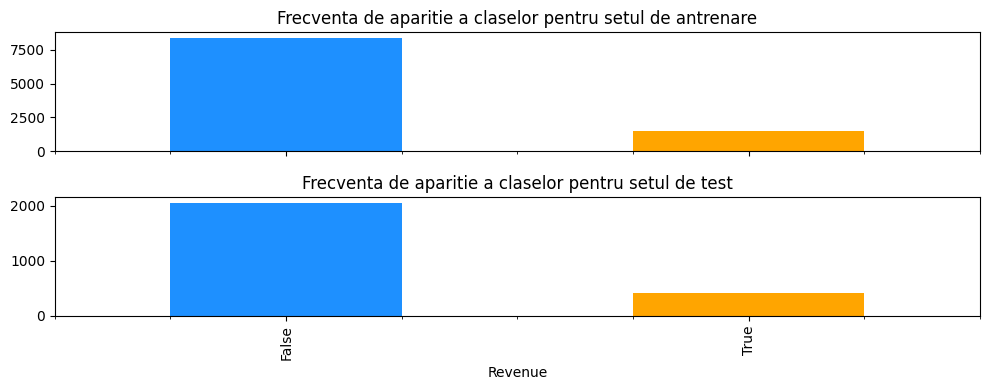

In [557]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

plot_class_frequencies(train_df, test_df)

Din graficul de mai sus observam ca cele doua seturi de date au frecventa claselor similara, avand aproximativ `15%` din intrari valoarea `True`.

In [558]:
import numpy as np

def plot_numerical_attribute(df, attribute_name):
    data = df[attribute_name]
    plt.hist(data, bins=10, color='dodgerblue', alpha=0.7, label='Column Data')
    plt.title(attribute_name)
    plt.show()

def plot_categorial_attribute(df, attribute_name):
    data = df[attribute_name].value_counts().sort_values(ascending=False)
    print(data)
    data.plot(kind='bar', color='dodgerblue', rot=0)
    plt.hist(data, )
    plt.title(attribute_name)
    plt.show()


In [559]:
from enum import Enum

class AttributeType(Enum):
    NUMERICAL = 1
    CATEGORIAL = 2

attribute_names_to_types = {
    'Administrative': AttributeType.NUMERICAL,
    'Administrative_Duration': AttributeType.NUMERICAL,
    'Informational': AttributeType.NUMERICAL,
    'Informational_Duration': AttributeType.NUMERICAL,
    'ProductRelated': AttributeType.NUMERICAL,
    'ProductRelated_Duration': AttributeType.NUMERICAL,
    'BounceRates': AttributeType.NUMERICAL,
    'ExitRates': AttributeType.NUMERICAL,
    'PageValues': AttributeType.NUMERICAL,
    'SpecialDay': AttributeType.NUMERICAL,
    'Month': AttributeType.CATEGORIAL,
    'OperatingSystems': AttributeType.CATEGORIAL,
    'Browser': AttributeType.CATEGORIAL,
    'Region': AttributeType.CATEGORIAL,
    'TrafficType': AttributeType.CATEGORIAL,
    'VisitorType': AttributeType.CATEGORIAL,
    'Weekend': AttributeType.CATEGORIAL,
    'Revenue': AttributeType.CATEGORIAL
}


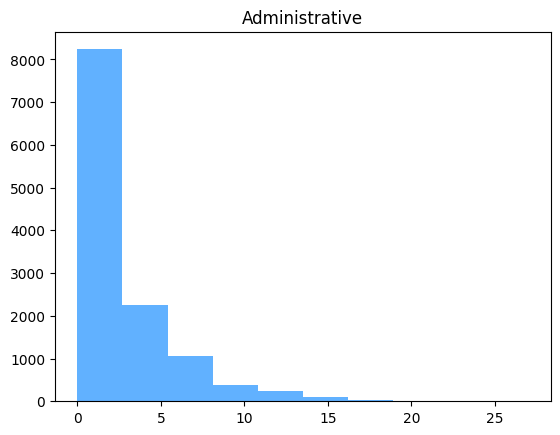

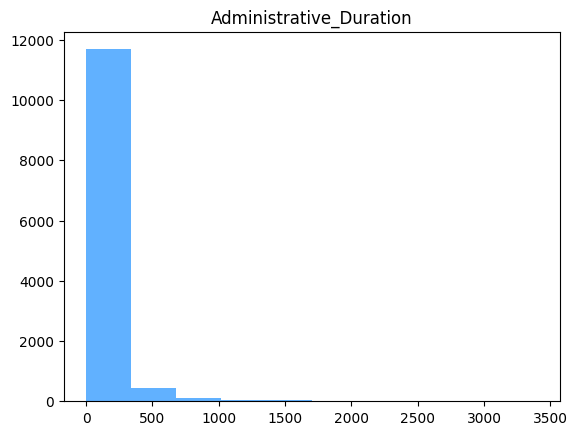

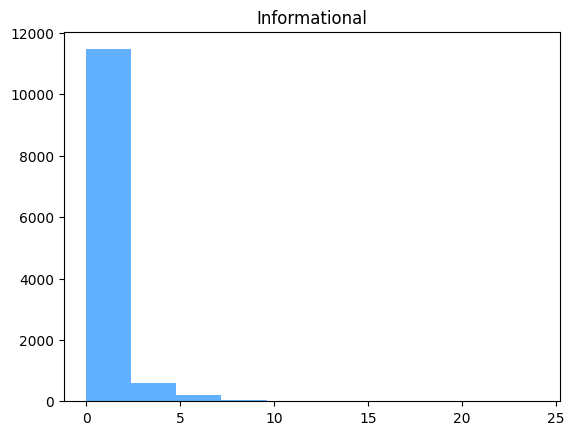

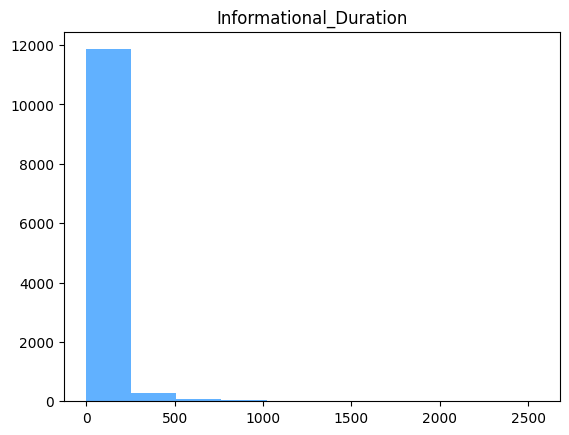

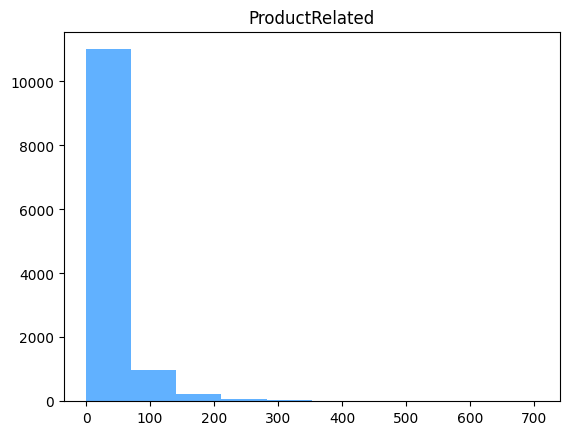

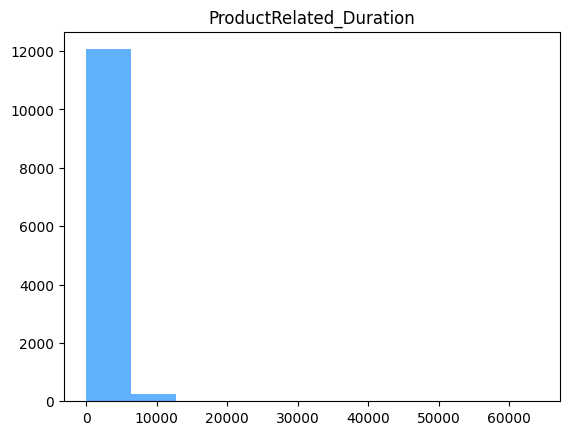

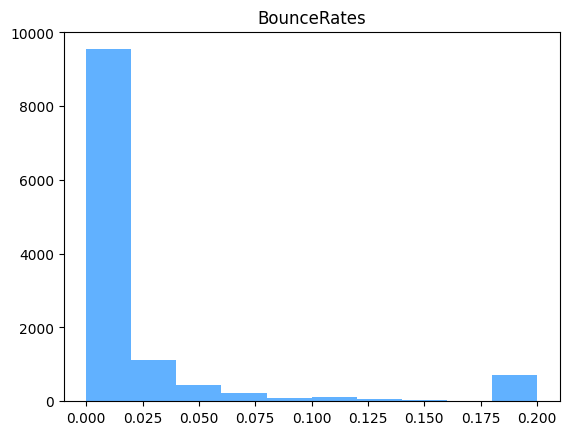

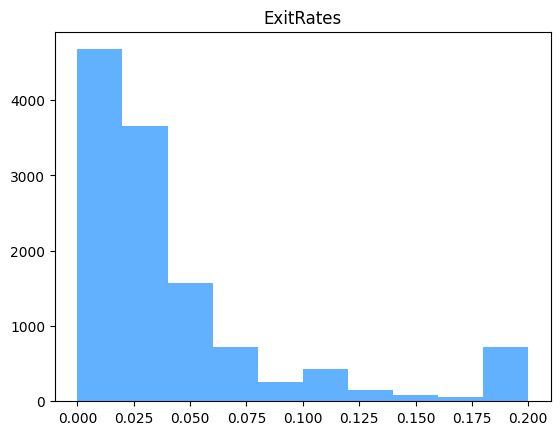

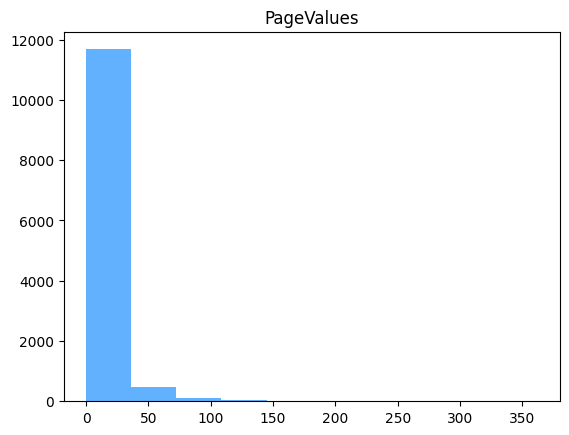

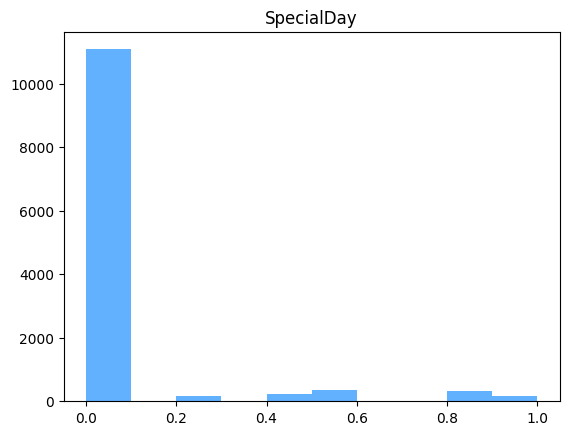

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


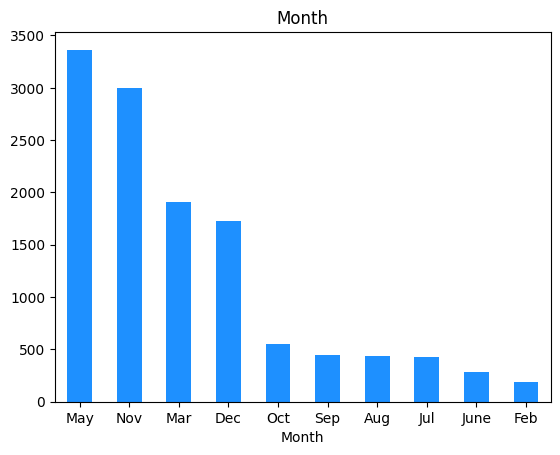

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64


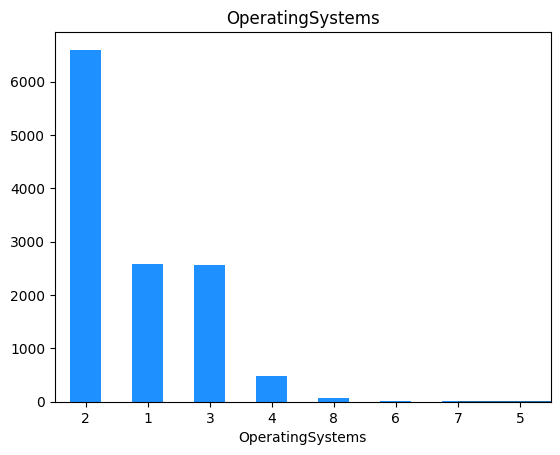

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64


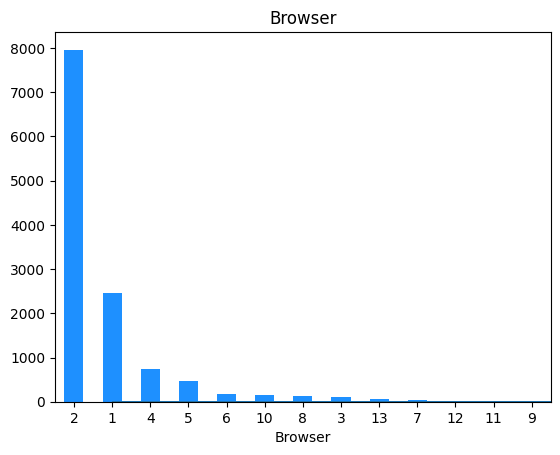

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64


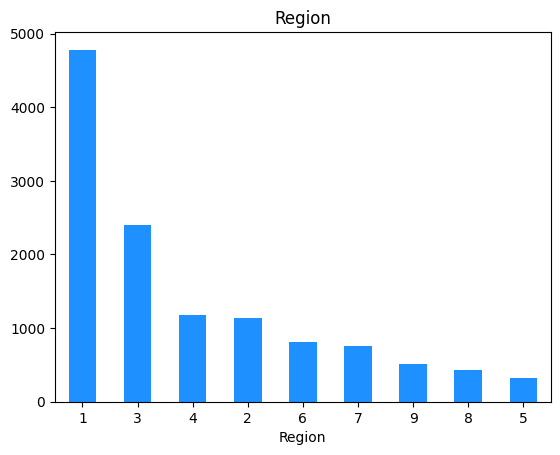

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64


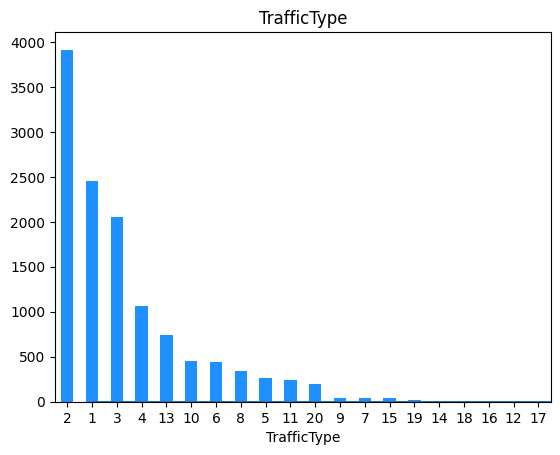

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


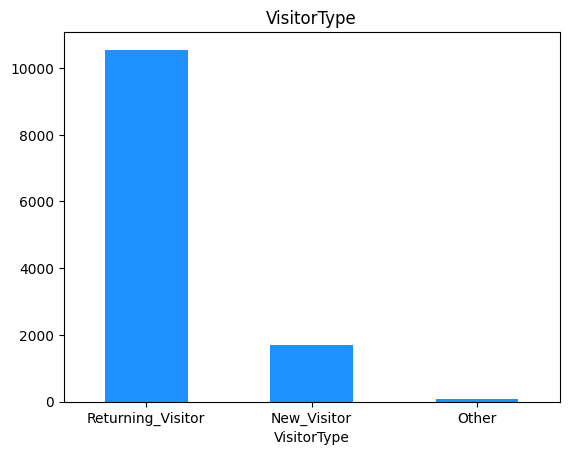

Weekend
False    9462
True     2868
Name: count, dtype: int64


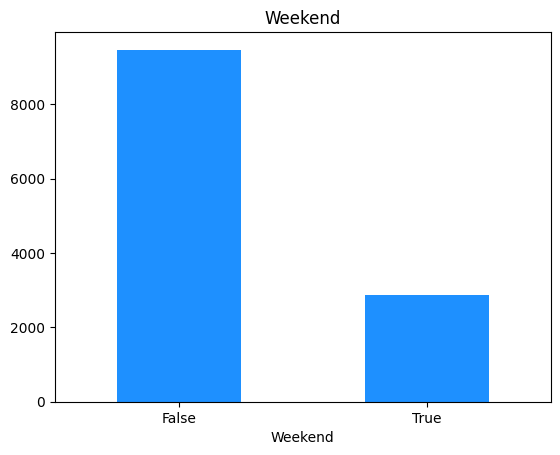

Revenue
False    10422
True      1908
Name: count, dtype: int64


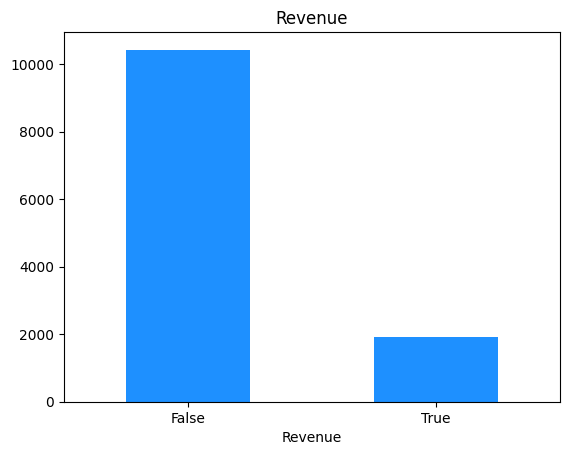

In [560]:
attribute_type_to_plot_function = {
    AttributeType.NUMERICAL: plot_numerical_attribute,
    AttributeType.CATEGORIAL: plot_categorial_attribute
}

for attribute_name, attribute_type in attribute_names_to_types.items():
    attribute_type_to_plot_function[attribute_type](df, attribute_name)

In [561]:
from scipy import stats

def compute_numerical_attribute_correlation(df, attribute_name, target_attribute_name='Revenue'):
    return stats.pointbiserialr(df[target_attribute_name], df[attribute_name])

def compute_categorial_attribute_correlation(df, attribute_name, target_attribute_name='Revenue'):
    chisqt = pd.crosstab(df[target_attribute_name], df[attribute_name], margins=True)
    category_count = chisqt.shape[1]
    values = np.array([
        chisqt.iloc[0][0:category_count].values,
        chisqt.iloc[1][0:category_count].values
    ])
    return stats.chi2_contingency(values)[0:2]

attribute_type_to_correlation_function = {
    AttributeType.NUMERICAL: compute_numerical_attribute_correlation,
    AttributeType.CATEGORIAL: compute_categorial_attribute_correlation
}

def generate_correlation_data_and_hist(df, attr_type, target_attribute_name='Revenue'):
    correlation_data = {
        'Attribute': [],
        'Coefficient': [],
        'p-value': [],
    }
    
    hist_data = {
        'Attribute': [],
        'Coefficient': [],
    }

    for attribute_name, attribute_type in attribute_names_to_types.items():
        if attribute_type != attr_type or attribute_name == target_attribute_name:
            continue
        coef, p_value = attribute_type_to_correlation_function[attribute_type](df, attribute_name)
        correlation_data['Attribute'].append(attribute_name)
        correlation_data['Coefficient'].append(coef)
        correlation_data['p-value'].append(p_value)
        if p_value > 0.05:
            continue
        hist_data['Attribute'].append(attribute_name)
        hist_data['Coefficient'].append(coef)

    return correlation_data, hist_data

,Attribute,Coefficient,p-value
0,Administrative,0.138917,3.519760e-54
1,Administrative_Duration,0.093587,2.146514e-25
2,Informational,0.095200,3.174034e-26
3,Informational_Duration,0.070345,5.282871e-15
4,ProductRelated,0.158538,3.241187e-70
5,ProductRelated_Duration,0.152373,6.115338e-65
6,BounceRates,-0.150673,1.594198e-63
7,ExitRates,-0.207071,1.662654e-119
8,PageValues,0.492569,0.000000e+00
9,SpecialDay,-0.082305,5.498934e-20


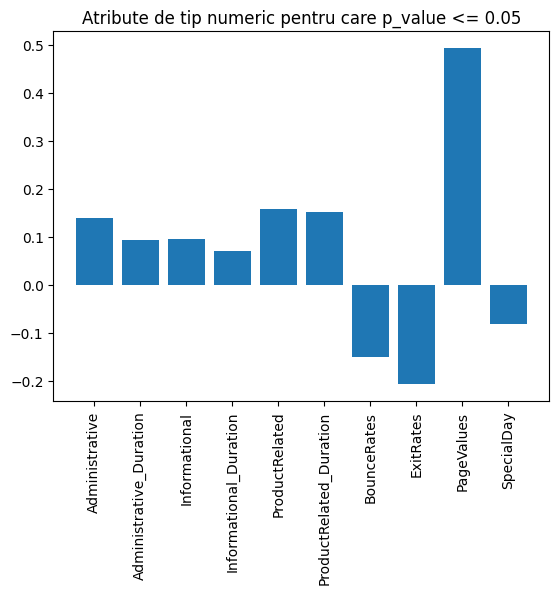

,Attribute,Coefficient,p-value
0,Month,384.934762,1.509275e-76
1,OperatingSystems,75.027056,4.871504e-13
2,Browser,27.715299,9.913964e-03
3,Region,9.252751,4.142779e-01
4,TrafficType,373.145565,7.442025e-67
5,VisitorType,135.251923,3.991223e-29
6,Weekend,10.581835,5.037136e-03


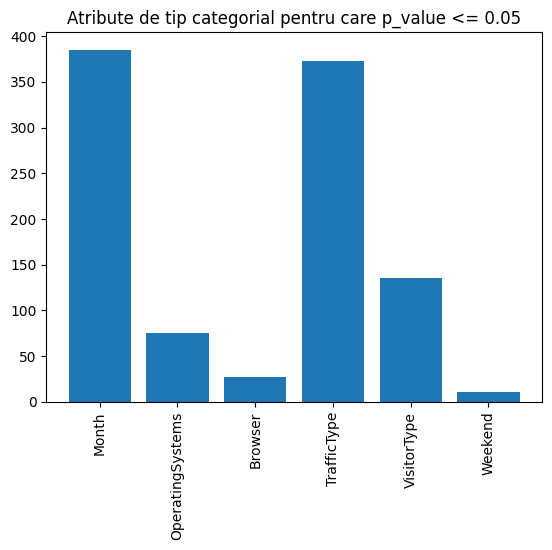

In [562]:
from IPython.display import display

num_attr_correlation_data, num_attr_hist_data = generate_correlation_data_and_hist(df, AttributeType.NUMERICAL)
display(pd.DataFrame(num_attr_correlation_data))
plt.bar(num_attr_hist_data['Attribute'], num_attr_hist_data['Coefficient'])
plt.xticks(rotation=90)
plt.title('Atribute de tip numeric pentru care p_value <= 0.05')
plt.show()

categ_attr_correlation_data, categ_attr_hist_data = generate_correlation_data_and_hist(df, AttributeType.CATEGORIAL)
display(pd.DataFrame(categ_attr_correlation_data))
plt.bar(categ_attr_hist_data['Attribute'], categ_attr_hist_data['Coefficient'])
plt.xticks(rotation=90)
plt.title('Atribute de tip categorial pentru care p_value <= 0.05')
plt.show()


In [563]:
from sklearn.preprocessing import LabelEncoder

# Convertim doar variabilele categoriale care nu sunt deja numerice
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])
display(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [564]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def normalize_all_numerical_df(df, scaler):
    numeric_cols = [attr for attr, attr_type in attribute_names_to_types.items() if attr != 'Revenue']
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

min_max_normalized_df = normalize_all_numerical_df(df, MinMaxScaler())
display(min_max_normalized_df)

std_normalized_df = normalize_all_numerical_df(df, StandardScaler())
display(std_normalized_df)

robust_normalized_df = normalize_all_numerical_df(df, RobustScaler())
display(robust_normalized_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0,0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0,0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0,0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0,0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,0.111111,0.428571,0.416667,0.000,0.000000,1.0,1.0,0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.777778,0.285714,0.083333,0.000,0.368421,1.0,1.0,0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,0.777778,0.285714,0.083333,0.000,0.631579,1.0,1.0,0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.777778,0.142857,0.083333,0.250,0.526316,1.0,0.0,0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,-1.756881,2.058618,2.121412,-0.894178,-0.762629,0.407786,1.816360,0
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,0.976499,0.407786,1.816360,0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,2.218733,0.407786,1.816360,0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.061364,1.721839,0.407786,-0.550552,0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.710742,4.895621,0.000000,0.0,-2.0,-1.0,-0.582341,-0.666667,-0.5,0.000000,0.000000,0
1,-0.25,-0.080424,0.0,0.0,-0.516129,-0.417913,-0.185128,2.095621,0.000000,0.0,-2.0,0.0,0.000000,-0.666667,0.0,0.000000,0.000000,0
2,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.710742,4.895621,0.000000,0.0,-2.0,2.0,-0.582341,2.000000,0.5,0.000000,0.000000,0
3,-0.25,-0.080424,0.0,0.0,-0.516129,-0.465829,2.788840,3.215621,0.000000,0.0,-2.0,1.0,0.000000,-0.333333,1.0,0.000000,0.000000,0
4,-0.25,-0.080424,0.0,0.0,-0.258065,0.022315,1.004459,0.695621,0.000000,0.0,-2.0,1.0,0.582341,-0.666667,1.0,0.000000,2.366912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.50,1.474432,0.0,0.0,1.129032,0.925654,0.239725,0.108478,0.659302,0.0,-2.5,2.0,2.329364,-0.666667,-0.5,0.000000,2.366912,0
12326,-0.25,-0.080424,0.0,0.0,-0.419355,-0.104051,-0.185128,-0.107046,0.000000,0.0,0.5,1.0,0.000000,-0.666667,3.0,0.000000,2.366912,0
12327,-0.25,-0.080424,0.0,0.0,-0.387097,-0.323969,4.771485,1.722287,0.000000,0.0,0.5,1.0,0.000000,-0.666667,5.5,0.000000,2.366912,0
12328,0.75,0.723812,0.0,0.0,-0.096774,-0.197604,-0.185128,-0.114906,0.000000,0.0,0.5,0.0,0.000000,0.000000,4.5,0.000000,0.000000,0


In [565]:
def split_dataset(df, test_size=0.2, target_attribute='Revenue'):
    train_df, test_df = train_test_split(df, test_size=test_size)
    X_train = train_df.drop(columns=[target_attribute]).values
    T_train = train_df[target_attribute].values
    X_test = test_df.drop(columns=[target_attribute]).values
    T_test = test_df[target_attribute].values
    return X_train, T_train, X_test, T_test


In [566]:
import math
import sys

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

def nll(Y, T):
    return -sum(t * math.log(y) + (1. - t) * math.log(1. - (y if y != 1 else 0.9999999999)) for y, t in zip(Y, T))

def accuracy(Y, T):
    return sum(y < .5 and t < .5 or y >= .5 and t >= .5 for y, t in zip(Y, T)) / len(T)

def train_logistic(X, T, lr=.01, epochs_no=100):
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    W = np.random.randn((D+1))

    for _ in range(epochs_no):
        W -= lr * np.transpose(X_hat) @ (logistic(X_hat @ W) - T)
    return W

def predict_logistic(X, W):
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    l = X_hat @ W
    return logistic(l)

In [567]:
from sklearn.metrics import precision_score, recall_score, f1_score

def logistic_regression(X_train, T_train, X_test, T_test, lr=0.001, epochs_no=1000):
    W = train_logistic(X_train, T_train, lr=lr, epochs_no=epochs_no)
    T_pred = [1 if pred >= 0.5 else 0 for pred in predict_logistic(X_test, W)]
    precision = precision_score(T_test, T_pred)
    recall = recall_score(T_test, T_pred)
    f1 = f1_score(T_test, T_pred)
    return precision, recall, f1
    

In [568]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_sklearn(X_train, T_train, X_test, T_test):
    model = LogisticRegression()
    model.fit(X_train, T_train)
    T_pred = model.predict(X_test)
    precision = precision_score(T_test, T_pred)
    recall = recall_score(T_test, T_pred)
    f1 = f1_score(T_test, T_pred)
    return precision, recall, f1

# print(logistic_regression_sklearn(*split_dataset(min_max_normalized_df), lr=0.001))
# print(logistic_regression(*split_dataset(min_max_normalized_df), lr=0.001))

In [569]:
df = pd.read_csv('dataset.csv')

def normalize_df(df, scaler):
    numeric_cols = [attr for attr, attr_type in attribute_names_to_types.items() if attr_type == AttributeType.NUMERICAL]
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

min_max_normalized_df = normalize_df(df, MinMaxScaler())
display(min_max_normalized_df)

std_normalized_df = normalize_df(df, StandardScaler())
display(std_normalized_df)

robust_normalized_df = normalize_df(df, RobustScaler())
display(robust_normalized_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,2,2,1,2,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,4,1,9,3,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,Dec,4,6,1,1,Returning_Visitor,True,False
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,Nov,3,2,1,8,Returning_Visitor,True,False
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,Nov,3,2,1,13,Returning_Visitor,True,False
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,Nov,2,2,3,11,Returning_Visitor,False,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.710742,4.895621,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.25,-0.080424,0.0,0.0,-0.516129,-0.417913,-0.185128,2.095621,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.710742,4.895621,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,-0.25,-0.080424,0.0,0.0,-0.516129,-0.465829,2.788840,3.215621,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.25,-0.080424,0.0,0.0,-0.258065,0.022315,1.004459,0.695621,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.50,1.474432,0.0,0.0,1.129032,0.925654,0.239725,0.108478,0.659302,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,-0.25,-0.080424,0.0,0.0,-0.419355,-0.104051,-0.185128,-0.107046,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,-0.25,-0.080424,0.0,0.0,-0.387097,-0.323969,4.771485,1.722287,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,0.75,0.723812,0.0,0.0,-0.096774,-0.197604,-0.185128,-0.114906,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [570]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_classifying_sklearn(X_train, T_train, X_test, T_test, max_depth=6):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, T_train)
    T_pred = tree.predict(X_test)
    precision = precision_score(T_test, T_pred)
    recall = recall_score(T_test, T_pred)
    f1 = f1_score(T_test, T_pred)
    return precision, recall, f1

# print(decision_tree_classifying_sklearn(*split_dataset(min_max_normalized_df), max_depth=6))

In [571]:
attr_to_types = {
    'ATTR_0': AttributeType.NUMERICAL,
    'ATTR_1': AttributeType.NUMERICAL,
    'ATTR_2': AttributeType.NUMERICAL,
    'ATTR_3': AttributeType.NUMERICAL,
    'ATTR_4': AttributeType.NUMERICAL,
    'ATTR_5': AttributeType.NUMERICAL,
    'ATTR_6': AttributeType.NUMERICAL,
    'ATTR_7': AttributeType.NUMERICAL,
    'ATTR_8': AttributeType.NUMERICAL,
    'ATTR_9': AttributeType.NUMERICAL,
    'ATTR_10': AttributeType.CATEGORIAL,
    'ATTR_11': AttributeType.CATEGORIAL,
    'ATTR_12': AttributeType.CATEGORIAL,
    'ATTR_13': AttributeType.CATEGORIAL,
    'ATTR_14': AttributeType.CATEGORIAL,
    'ATTR_15': AttributeType.CATEGORIAL,
    'ATTR_16': AttributeType.CATEGORIAL,
}

class Node:
    def __init__(self, label):
        """
            for non-leafs it is the name of the attribute and the split value
            for leafs it is the class
        """
        self.label = label

        # Instead of self.children
        self.left = None
        self.right = None

def most_frequent_class(X):
    classes = [e['CLASS'] for e in X]
    return max(set(classes), key=classes.count)

def gini_gain(left, right):
    total_rows = len(left) + len(right)
    gini = 0.0
    
    if len(left) != 0:
        true_freq = sum(row['CLASS'] for row in left) / len(left)
        false_freq = sum(not row['CLASS'] for row in left) / len(left)
        score = true_freq * true_freq + false_freq * false_freq
        gini += (1.0 - score) * (len(left) / total_rows)
    
    if len(right) != 0:
        true_freq = sum(row['CLASS'] for row in right) / len(right)
        false_freq = sum(not row['CLASS'] for row in right) / len(right)
        score = true_freq * true_freq + false_freq * false_freq
        gini += (1.0 - score) * (len(right) / total_rows)
    
    return gini

def best_numerical_gini_gain(X, a):
    unique_values = set(row[a] for row in X)
    best_split = None, None, None, None, 10
    
    for value in unique_values:
        left, right = [], []
        for r in X:
            if r[a] < value:
                left.append(r)
            else:
                right.append(r)
        gini = gini_gain(left, right)
        if best_split[4] > gini:
            best_split = a, value, left, right, gini
        
    return best_split

def best_nominal_gini_gain(X, a):
    unique_categories = set(row[a] for row in X)
    best_split = None, None, None, None, 10
    
    for category in unique_categories:
        left, right = [], []
        for row in X:
            if row[a] == category:
                left.append(row)
            else:
                right.append(row)
        gini = gini_gain(left, right)
        if best_split[4] > gini:
            best_split = a, category, left, right, gini
    
    return best_split

def build_decision_tree(X, A, max_depth):
    if max_depth <= 0:
        return Node(('CLASS', most_frequent_class(X)))
    
    class_values = [e['CLASS'] for e in X]
    if all(val == class_values[0] for val in class_values):
        return Node(('CLASS', class_values[0]))
    
    best_split = None, None, None, None, 10
    
    for attr in A:
        candidate_split = None
        if attr_to_types[attr] == AttributeType.CATEGORIAL:
            candidate_split = best_nominal_gini_gain(X, attr)
        elif attr_to_types[attr] == AttributeType.NUMERICAL:
            candidate_split = best_numerical_gini_gain(X, attr)
            
        if best_split[4] > candidate_split[4]:
            best_split = candidate_split
    
    new_A = [atr for atr in A if atr != best_split[0]]
    node = Node((best_split[0], best_split[1]))
    node.left = build_decision_tree(best_split[2], new_A, max_depth - 1)
    node.right = build_decision_tree(best_split[3], new_A, max_depth - 1)    
    return node


def predict_entry(tree, row):
    attr, value = tree.label
    if attr == 'CLASS':
        return value
    
    if row[attr] < value:
        return predict_entry(tree.left, row)
    return predict_entry(tree.right, row)


def predict_decision_tree(tree, X_test):
    T_pred = []
    for X_t in X_test:
        row = {}
        for i in range(len(X_t)):
            row[f'ATTR_{i}'] = X_t[i]
        T_pred.append(predict_entry(tree, row))
    return T_pred


def decision_tree_classifying(X_train, T_train, X_test, T_test, max_depth=6):
    X = []
    for X_t, T_t in zip(X_train, T_train):
        row = {}
        for i in range(len(X_t)):
            row[f'ATTR_{i}'] = X_t[i]
        row['CLASS'] = T_t
        X.append(row)
    A = [f'ATTR_{i}' for i in range(len(X_train[0]))]
    tree = build_decision_tree(X, A, max_depth)
    T_pred = predict_decision_tree(tree, X_test)
    precision = precision_score(T_test, T_pred)
    recall = recall_score(T_test, T_pred)
    f1 = f1_score(T_test, T_pred)
    return precision, recall, f1

In [572]:
algorithnm_to_name = {
    logistic_regression: 'logistic_manual',
    logistic_regression_sklearn: 'logistic_sklearn',
    decision_tree_classifying: 'decision_tree_manual',
    decision_tree_classifying_sklearn: 'decision_tree_sklearn',
}

def test_algorithm(func, scaler, max_depth=None):
    df = pd.read_csv('dataset.csv')
    result = None
    config = None
    func_name = algorithnm_to_name[func]
    if func == logistic_regression or func == logistic_regression_sklearn or func == decision_tree_classifying_sklearn:
        le = LabelEncoder()
        df['Month'] = le.fit_transform(df['Month'])
        df['VisitorType'] = le.fit_transform(df['VisitorType'])
        df['Weekend'] = le.fit_transform(df['Weekend'])
        df['Revenue'] = le.fit_transform(df['Revenue'])
        df = normalize_all_numerical_df(df, scaler)
        result = func(*split_dataset(df), max_depth) if func == decision_tree_classifying_sklearn else func(*split_dataset(df))
        config = f'{func_name} + {scaler}'
    elif func == decision_tree_classifying:
        df = normalize_df(df, scaler)
        result = func(*split_dataset(df), max_depth)
        config = f'{func_name} + {scaler} + {max_depth}'
    return config, result[0], result[1], result[2]
    

In [573]:
import statistics

testing_data = {
    'Configuration': [],
    'Precision Mean': [],
    'Precision Variance': [],
    'Recall Mean': [],
    'Recall Variance': [],
    'F1 Mean': [],
    'F1 Variance': [],
}

def test_configuration(text, func, scaler_type, max_depth, iterations=10):
    print(text)
    config = None
    precisions = []
    recalls = []
    F1s = []
    for index in range(iterations):
        scaler = None
        if scaler_type == 'min_max':
            scaler = MinMaxScaler()
        elif scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        config, precision, recall, f1 = test_algorithm(func, scaler, max_depth)
        print(f'Run {index} results:')
        print(config, precision, recall, f1)
        precisions.append(precision)
        recalls.append(recall)
        F1s.append(f1)
    testing_data['Configuration'].append(config)
    testing_data['Precision Mean'].append(statistics.mean(precisions))
    testing_data['Precision Variance'].append(statistics.variance(precisions))
    testing_data['Recall Mean'].append(statistics.mean(recalls))
    testing_data['Recall Variance'].append(statistics.variance(recalls))
    testing_data['F1 Mean'].append(statistics.mean(F1s))
    testing_data['F1 Variance'].append(statistics.variance(F1s))




In [574]:
test_configuration('Testing manual logistic regression with MinMaxScaler', logistic_regression, 'min_max', None)
test_configuration('Testing manual logistic regression with StandardScaler', logistic_regression, 'standard', None)
test_configuration('Testing manual logistic regression with RobustScaler', logistic_regression, 'robust', None)

test_configuration('Testing sklearn logistic regression with MinMaxScaler', logistic_regression_sklearn, 'min_max', None)
test_configuration('Testing sklearn logistic regression with StandardScaler', logistic_regression_sklearn, 'standard', None)
test_configuration('Testing sklearn logistic regression with RobustScaler', logistic_regression_sklearn, 'robust', None)

for d in range(3, 7):
    test_configuration(f'Testing sklearn decision tree, max_depth {d} with MinMaxScaler', decision_tree_classifying_sklearn, 'min_max', d)

for d in range(3, 7):
    test_configuration(f'Testing sklearn decision tree, max_depth {d} with StandardScaler', decision_tree_classifying_sklearn, 'standard', d)

for d in range(3, 7):
    test_configuration(f'Testing sklearn decision tree, max_depth {d} with RobustScaler', decision_tree_classifying_sklearn, 'robust', d)

Testing manual logistic regression with MinMaxScaler
Run 0 results:
logistic_manual + MinMaxScaler() 0.75 0.4760705289672544 0.5824345146379044
Run 1 results:
logistic_manual + MinMaxScaler() 0.7368421052631579 0.2765432098765432 0.4021543985637343
Run 2 results:
logistic_manual + MinMaxScaler() 0.7103174603174603 0.468586387434555 0.5646687697160884
Run 3 results:
logistic_manual + MinMaxScaler() 0.725 0.23450134770889489 0.3543788187372709
Run 4 results:
logistic_manual + MinMaxScaler() 0.7768595041322314 0.24671916010498687 0.3745019920318725
Run 5 results:
logistic_manual + MinMaxScaler() 0.7265625 0.24603174603174602 0.3675889328063241
Run 6 results:
logistic_manual + MinMaxScaler() 0.8 0.2975206611570248 0.43373493975903615
Run 7 results:
logistic_manual + MinMaxScaler() 0.7985074626865671 0.28083989501312334 0.4155339805825242
Run 8 results:
logistic_manual + MinMaxScaler() 0.7835820895522388 0.257985257985258 0.3881700554528651
Run 9 results:
logistic_manual + MinMaxScaler() 0.

/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 0 results:
logistic_manual + RobustScaler() 0.5901639344262295 0.5510204081632653 0.5699208443271767


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 1 results:
logistic_manual + RobustScaler() 0.629757785467128 0.489247311827957 0.5506807866868382


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 2 results:
logistic_manual + RobustScaler() 0.6267409470752089 0.5639097744360902 0.5936675461741425


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 3 results:
logistic_manual + RobustScaler() 0.6189111747851003 0.5983379501385041 0.6084507042253521


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 4 results:
logistic_manual + RobustScaler() 0.6129943502824858 0.5740740740740741 0.592896174863388


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 5 results:
logistic_manual + RobustScaler() 0.6128048780487805 0.5248041775456919 0.5654008438818564


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 6 results:
logistic_manual + RobustScaler() 0.6567656765676567 0.5497237569060773 0.5984962406015036


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 7 results:
logistic_manual + RobustScaler() 0.6198830409356725 0.5808219178082191 0.5997171145685997


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 8 results:
logistic_manual + RobustScaler() 0.7209302325581395 0.3220779220779221 0.4452423698384201


/var/folders/tg/75b62_cx3fg4v4z6hhy2z4xc0000gn/T/ipykernel_50037/1395362176.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Run 9 results:
logistic_manual + RobustScaler() 0.5217391304347826 0.030534351145038167 0.05769230769230769
Testing sklearn logistic regression with MinMaxScaler
Run 0 results:
logistic_sklearn + MinMaxScaler() 0.7293233082706767 0.2519480519480519 0.3745173745173745
Run 1 results:
logistic_sklearn + MinMaxScaler() 0.8027210884353742 0.30025445292620867 0.437037037037037
Run 2 results:
logistic_sklearn + MinMaxScaler() 0.7727272727272727 0.26356589147286824 0.3930635838150289
Run 3 results:
logistic_sklearn + MinMaxScaler() 0.8613138686131386 0.29797979797979796 0.4427767354596623
Run 4 results:
logistic_sklearn + MinMaxScaler() 0.6986301369863014 0.2779291553133515 0.39766081871345027
Run 5 results:
logistic_sklearn + MinMaxScaler() 0.8478260869565217 0.2708333333333333 0.4105263157894737
Run 6 results:
logistic_sklearn + MinMaxScaler() 0.75 0.2756756756756757 0.40316205533596833
Run 7 results:
logistic_sklearn + MinMaxScaler() 0.7708333333333334 0.2898172323759791 0.4212523719165085


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Run 0 results:
logistic_sklearn + RobustScaler() 0.7528735632183908 0.33248730964467005 0.46126760563380287
Run 1 results:
logistic_sklearn + RobustScaler() 0.7772020725388601 0.38961038961038963 0.5190311418685121


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Run 2 results:
logistic_sklearn + RobustScaler() 0.7447916666666666 0.3961218836565097 0.5171790235081374
Run 3 results:
logistic_sklearn + RobustScaler() 0.7142857142857143 0.40106951871657753 0.5136986301369864
Run 4 results:
logistic_sklearn + RobustScaler() 0.7437185929648241 0.3978494623655914 0.5183887915936953


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Run 5 results:
logistic_sklearn + RobustScaler() 0.7631578947368421 0.36523929471032746 0.4940374787052811
Run 6 results:
logistic_sklearn + RobustScaler() 0.7840909090909091 0.3689839572192513 0.5018181818181817


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Run 7 results:
logistic_sklearn + RobustScaler() 0.7801047120418848 0.4116022099447514 0.538878842676311
Run 8 results:
logistic_sklearn + RobustScaler() 0.7905759162303665 0.38917525773195877 0.5215889464594129


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run 9 results:
logistic_sklearn + RobustScaler() 0.75 0.36061381074168797 0.4870466321243524
Testing sklearn decision tree, max_depth 3 with MinMaxScaler
Run 0 results:
decision_tree_sklearn + MinMaxScaler() 0.6537216828478964 0.5372340425531915 0.5897810218978103
Run 1 results:
decision_tree_sklearn + MinMaxScaler() 0.6790830945558739 0.6076923076923076 0.6414073071718539
Run 2 results:
decision_tree_sklearn + MinMaxScaler() 0.6638418079096046 0.5964467005076142 0.6283422459893049
Run 3 results:
decision_tree_sklearn + MinMaxScaler() 0.6256983240223464 0.6511627906976745 0.6381766381766382
Run 4 results:
decision_tree_sklearn + MinMaxScaler() 0.6811594202898551 0.6695156695156695 0.6752873563218391
Run 5 results:
decision_tree_sklearn + MinMaxScaler() 0.6954177897574124 0.6201923076923077 0.6556543837357052
Run 6 results:
decision_tree_sklearn + MinMaxScaler() 0.6353887399463807 0.6583333333333333 0.6466575716234652
Run 7 results:
decision_tree_sklearn + MinMaxScaler() 0.6436464088397

In [575]:
for d in range(3, 7):
    test_configuration(f'Testing manual decision tree, max_depth {d} with MinMaxScaler', decision_tree_classifying, 'min_max', d, 2)

for d in range(3, 7):
    test_configuration(f'Testing manual decision tree, max_depth {d} with StandardScaler', decision_tree_classifying, 'standard', d, 2)

for d in range(3, 7):
    test_configuration(f'Testing manual decision tree, max_depth {d} with RobustScaler', decision_tree_classifying, 'robust', d, 2)

Testing manual decision tree, max_depth 3 with MinMaxScaler
Run 0 results:
decision_tree_manual + MinMaxScaler() + 3 0.5812356979405034 0.625615763546798 0.6026097271648873
Run 1 results:
decision_tree_manual + MinMaxScaler() + 3 0.5880893300248139 0.6336898395721925 0.61003861003861
Testing manual decision tree, max_depth 4 with MinMaxScaler
Run 0 results:
decision_tree_manual + MinMaxScaler() + 4 0.6137566137566137 0.5829145728643216 0.5979381443298968
Run 1 results:
decision_tree_manual + MinMaxScaler() + 4 0.6107594936708861 0.5273224043715847 0.5659824046920822
Testing manual decision tree, max_depth 5 with MinMaxScaler
Run 0 results:
decision_tree_manual + MinMaxScaler() + 5 0.3967280163599182 0.5403899721448467 0.45754716981132076
Run 1 results:
decision_tree_manual + MinMaxScaler() + 5 0.5803108808290155 0.6054054054054054 0.5925925925925926
Testing manual decision tree, max_depth 6 with MinMaxScaler
Run 0 results:
decision_tree_manual + MinMaxScaler() + 6 0.2463768115942029 0.

In [582]:
# Correcting configuration label names
testing_data['Configuration'][6] = 'decision_tree_sklearn + MinMaxScaler() + depth 3'
testing_data['Configuration'][7] = 'decision_tree_sklearn + MinMaxScaler() + depth 4'
testing_data['Configuration'][8] = 'decision_tree_sklearn + MinMaxScaler() + depth 5'
testing_data['Configuration'][9] = 'decision_tree_sklearn + MinMaxScaler() + depth 6'

testing_data['Configuration'][10] = 'decision_tree_sklearn + StandardScaler() + depth 3'
testing_data['Configuration'][11] = 'decision_tree_sklearn + StandardScaler() + depth 4'
testing_data['Configuration'][12] = 'decision_tree_sklearn + StandardScaler() + depth 5'
testing_data['Configuration'][13] = 'decision_tree_sklearn + StandardScaler() + depth 6'

testing_data['Configuration'][14] = 'decision_tree_sklearn + RobustScaler() + depth 3'
testing_data['Configuration'][15] = 'decision_tree_sklearn + RobustScaler() + depth 4'
testing_data['Configuration'][16] = 'decision_tree_sklearn + RobustScaler() + depth 5'
testing_data['Configuration'][17] = 'decision_tree_sklearn + RobustScaler() + depth 6'

testing_data['Configuration'][18] = 'decision_tree_manual + MinMaxScaler() + depth 3'
testing_data['Configuration'][19] = 'decision_tree_manual + MinMaxScaler() + depth 4'
testing_data['Configuration'][20] = 'decision_tree_manual + MinMaxScaler() + depth 5'
testing_data['Configuration'][21] = 'decision_tree_manual + MinMaxScaler() + depth 6'

testing_data['Configuration'][22] = 'decision_tree_manual + StandardScaler() + depth 3'
testing_data['Configuration'][23] = 'decision_tree_manual + StandardScaler() + depth 4'
testing_data['Configuration'][24] = 'decision_tree_manual + StandardScaler() + depth 5'
testing_data['Configuration'][25] = 'decision_tree_manual + StandardScaler() + depth 6'

testing_data['Configuration'][26] = 'decision_tree_manual + RobustScaler() + depth 3'
testing_data['Configuration'][27] = 'decision_tree_manual + RobustScaler() + depth 4'
testing_data['Configuration'][28] = 'decision_tree_manual + RobustScaler() + depth 5'
testing_data['Configuration'][29] = 'decision_tree_manual + RobustScaler() + depth 6'

In [592]:
testing_results_df = pd.DataFrame(testing_data)
bold_rows = [2, 5, 7, 18]
styled_df = testing_results_df.style.apply(lambda x: ['background-color: green' if x.name in bold_rows else '' for i in x], axis=1)
display(styled_df)

,Configuration,Precision Mean,Precision Variance,Recall Mean,Recall Variance,F1 Mean,F1 Variance
0,logistic_manual + MinMaxScaler(),0.759444,0.001120,0.306128,0.008037,0.429234,0.006360
1,logistic_manual + StandardScaler(),0.792714,0.003635,0.349082,0.002573,0.480271,0.000883
2,logistic_manual + RobustScaler(),0.621069,0.002479,0.478455,0.030999,0.518216,0.028429
3,logistic_sklearn + MinMaxScaler(),0.777083,0.002461,0.278248,0.000220,0.409502,0.000410
4,logistic_sklearn + StandardScaler(),0.755721,0.000476,0.372473,0.000562,0.498617,0.000531
5,logistic_sklearn + RobustScaler(),0.760080,0.000551,0.381275,0.000573,0.507294,0.000482
6,decision_tree_sklearn + MinMaxScaler() + depth 3,0.653561,0.000675,0.621406,0.001554,0.636112,0.000502
7,decision_tree_sklearn + MinMaxScaler() + depth 4,0.721004,0.002114,0.598803,0.003378,0.650668,0.000427
8,decision_tree_sklearn + MinMaxScaler() + depth 5,0.710304,0.000704,0.564745,0.000504,0.628721,0.000254
9,decision_tree_sklearn + MinMaxScaler() + depth 6,0.688984,0.000585,0.587534,0.001164,0.633453,0.000456
